In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-10-11 08:50:44.870249: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-10-11 08:50:45.456609: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: NVIDIA A40 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 84 deviceMemorySize: 44.56GiB deviceMemoryBandwidth: 648.29GiB/s
2022-10-11 08:50:45.457425: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-10-11 08:50:45.459813: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-10-11 08:50:45.462112: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-10-11 08:50:45.462681: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-1

In [2]:
stream = "mock"

In [3]:
df, file = load_file(stream = stream)

../gaia_data/mock_streams/gaiamock_ra156.2_dec57.5_stream_feh-1.6_v3_863.npy


### Prepare datasets for training

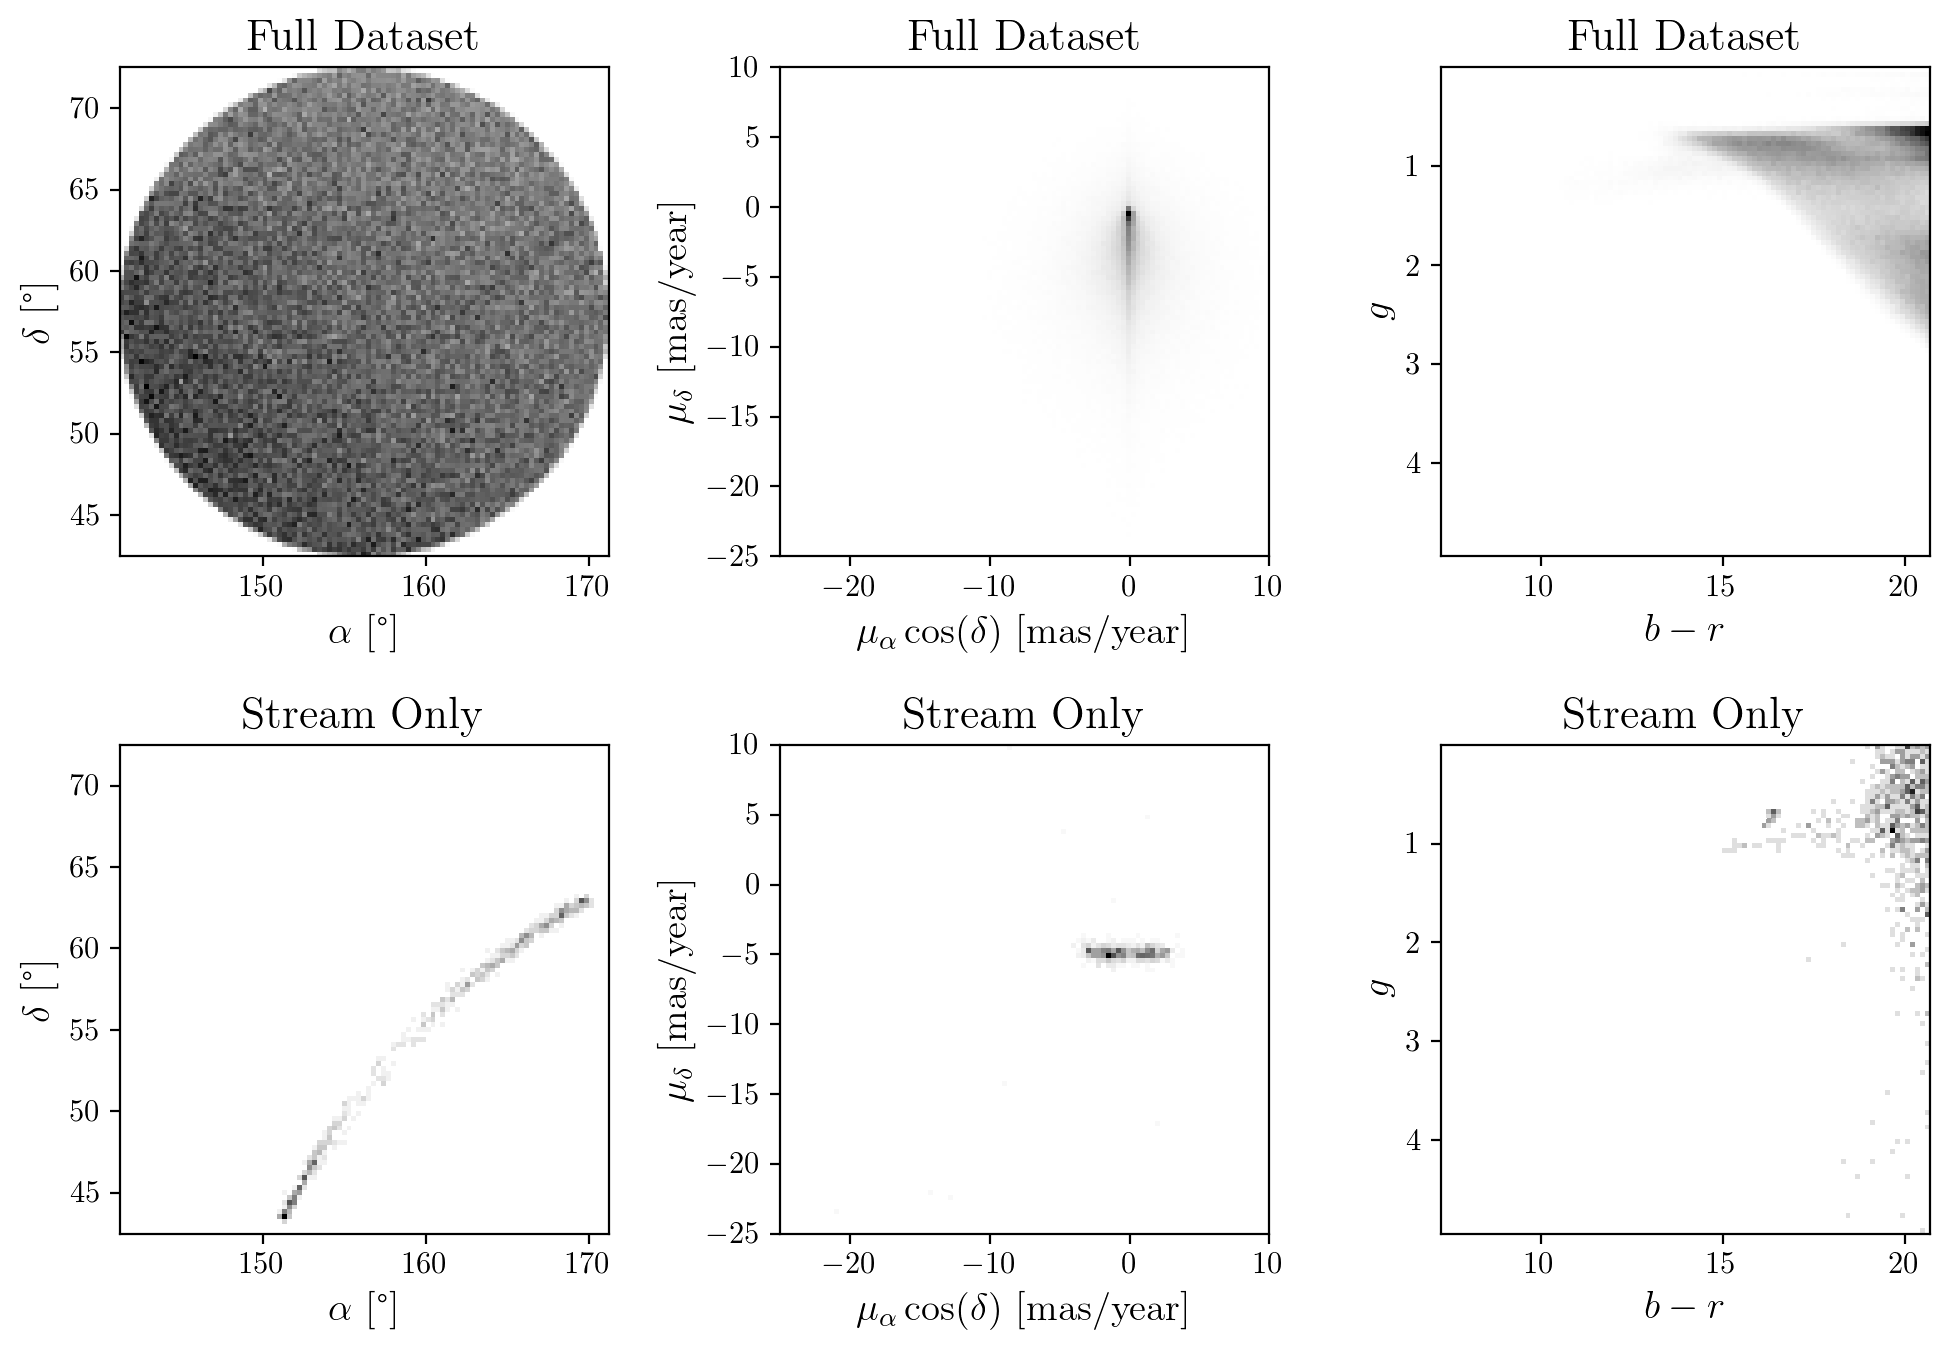

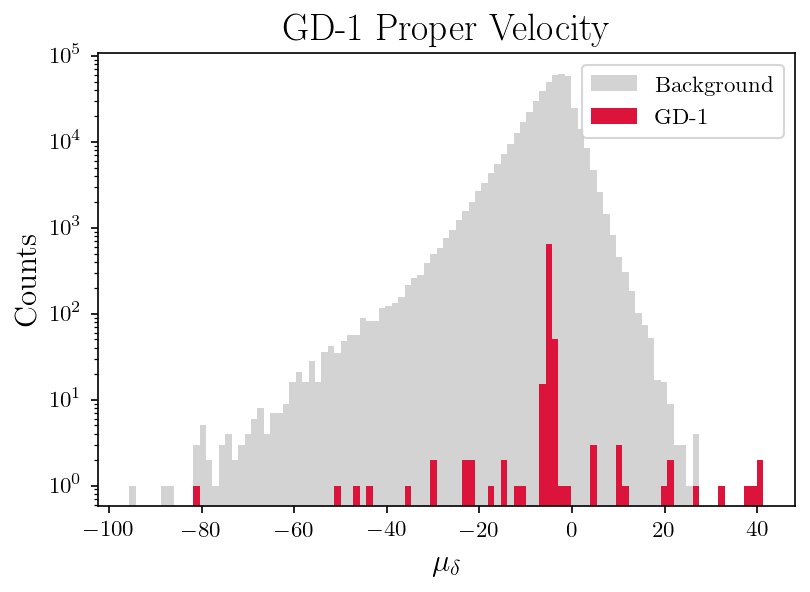

In [4]:
visualize_stream(df, save_folder="mock")

Sideband region: [-7.9,-1.7]
Signal region: [-6.4,-3.3]
Total counts: SR = 114,831, SB = 107,177
Signal region has 712 stream and 114,119 bkg events (0.62%).
Sideband region has 1 stream and 107,176 bkg events (0.00%).
f_sig = 668.7X f_sideband.


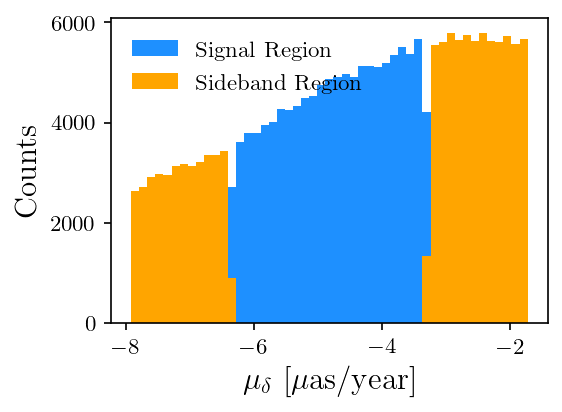

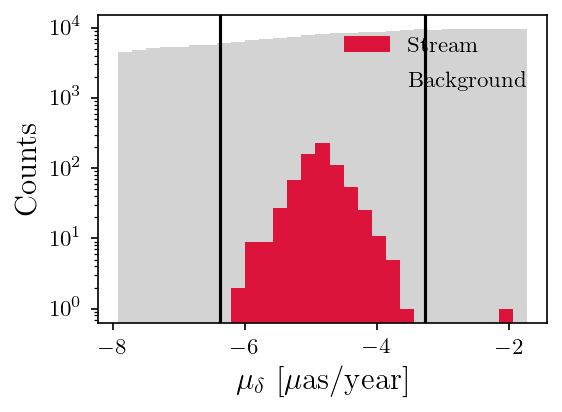

In [5]:
df = signal_sideband(df, stream = stream, save_folder = "mock")

# Train

[Step 2] Validation sets:   0%|          | 0/4 [00:00<?, ?it/s]

[Step 2] Validation sets (loops):   0%|          | 0/3 [00:00<?, ?it/s]

[Step 2] Validation sets (loops):  33%|███▎      | 1/3 [00:38<01:17, 38.64s/it]

[Step 2] Validation sets (loops):  67%|██████▋   | 2/3 [01:15<00:37, 37.57s/it]

[Step 2] Validation sets (loops): 100%|██████████| 3/3 [01:52<00:00, 37.47s/it]

[Step 2] Validation sets:  25%|██▌       | 1/4 [01:54<05:43, 114.64s/it]

[Step 2] Validation sets (loops):   0%|          | 0/3 [00:00<?, ?it/s]

[Step 2] Validation sets (loops):  33%|███▎      | 1/3 [00:35<01:11, 35.89s/it]

[Step 2] Validation sets (loops):  67%|██████▋   | 2/3 [01:13<00:36, 36.68s/it]

[Step 2] Validation sets (loops): 100%|██████████| 3/3 [01:49<00:00, 36.52s/it]

[Step 2] Validation sets:  50%|█████     | 2/4 [03:46<03:45, 112.76s/it]

[Step 2] Validation sets (loops):   0%|          | 0/3 [00:00<?, ?it/s]

[Step 2] Validation sets (loops):  33%|███▎      | 1/3 [00:37<01:14, 37.07s/it]

[

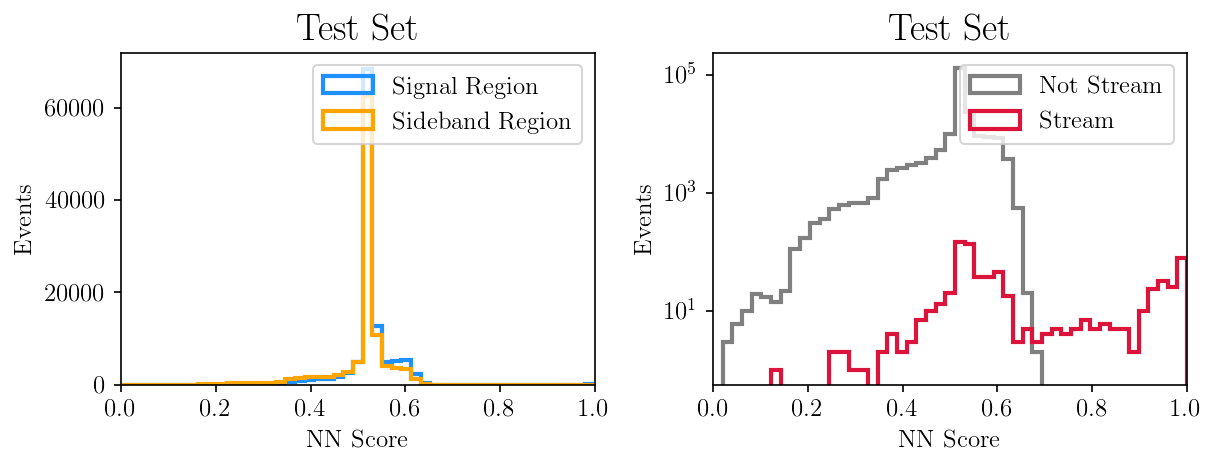

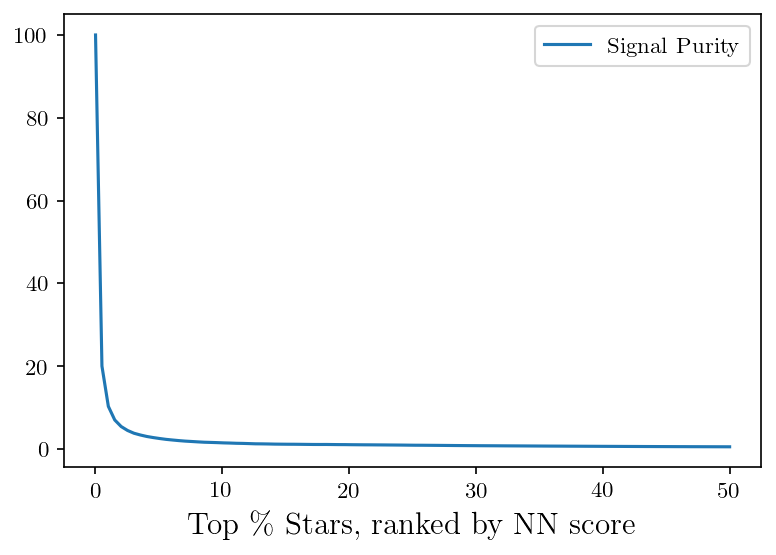

Top 50 stars: Purity = 100.0% 


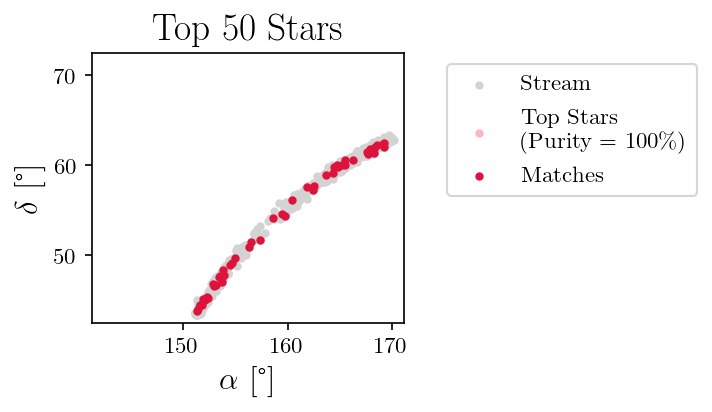

In [32]:
tf.keras.backend.clear_session()

test = train(df, 
      save_folder = "mock",
      n_folds = 5, 
      best_of_n_loops = 3,
      layer_size = 32, 
      batch_size = 1000,
      dropout = 0.2, 
      epochs = 100, 
      patience = 30,
      verbose = False,
            )